**Intensity-modulated radiation therapy (IMRT) is an advanced type of radiation therapy used to treat cancer and noncancerous tumors. IMRT uses advanced technology to manipulate photon and proton beams of radiation to conform to the shape of a tumor.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Function to plot the radiation output
def plotR(A, colormap):
  plt.pcolor(A,cmap= colormap)
  plt.colorbar()
  plt.grid()
  plt.show()

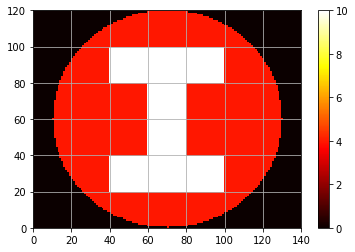

In [ ]:
#IMRT solution need to achieve
# 7x6 units with each beam splited into 20 small beamlets
A =np.zeros((120,140))
for i in range(120):
    for j in range(140):
        radius = ((i-60)**2 + (j-70)**2) **.5 #calculating threshold radius
        if radius <= 60:
            A[i][j]+=4              #intensity set to 4
for i in  range(40,100):
    for j in range(20,40):
        A[j][i]=10                  #intensity set to 10
for i in  range(60,80):
    for j in range(40,80):
        A[j][i]=10
for i in  range(40,100):
    for j in range(80,100):
        A[j][i]=10
print("The IMRT solution need to achieve")
plotR(A, 'hot') 

In [ ]:
#function to create a decaying radiation beam with respect to distance travelled 
def dose(r1, r2, c1, c2, intense, str ):
  beam = np.zeros((6, 7)) #rows & columns
  for i in  range(r1,r2):
      for j in range(c1,c2):
          beam[i][j] = intense
          if str == "UpDown":
            beam[i][j] = beam[i][j] - (((1/8)  * intense) * (r2 - i)) 
          if str == "DownUp":
            beam[i][j] = beam[i][j] - (((1/8)  * intense) * i)  #decreasing the intesity to half for every 4 units
          if str == "LeftRight":
            beam[i][j] = beam[i][j] - (((1/8)  * intense) * j)
          if str == "RightLeft":
            beam[i][j] = beam[i][j] -(((1/8)  * intense) * (c2 - j))
  return beam       

In [ ]:
#creating one beam with intensity 9
ta = dose(0,6,3,4, 9, "DownUp")
ta

array([[0.   , 0.   , 0.   , 9.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 7.875, 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 6.75 , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 5.625, 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 4.5  , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 3.375, 0.   , 0.   , 0.   ]])

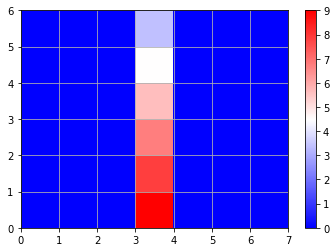

In [ ]:
plotR(ta, 'bwr')

In [ ]:
#creating different beams with different intensity and passed at different places
b1 = dose(0,6,2,3,3, "DownUp")
b2 = dose(0,6,3,4, 6, "DownUp")
b3 = dose(0,6,4,5, 3, "DownUp")

b4 = dose(1,2,0,7,5, "LeftRight")
b5 = dose(2,3,0,7, 3, "LeftRight")
b6 = dose(3,4,0,7, 3, "LeftRight")
b7 = dose(4,5,0,7, 5, "LeftRight")


b8 = dose(0,6,2,3, 3, "UpDown")
b9 = dose(0,6,3,4, 5, "UpDown")
b10 = dose(0,6,4,5, 3, "UpDown")

b11 = dose(1,2,0,7, 5, "RightLeft")
b12 = dose(2,3,0,7, 3, "RightLeft")
b13 = dose(3,4,0,7, 3, "RightLeft")
b14 = dose(4,5,0,7, 5, "RightLeft")

In [ ]:
#adding total intensity
b = b1 + b2+ b3 + b4 + b5 + b6 +b7 + b8 + b9 + b10 + b11 + b12 + b13 + b14
print(b)

[[ 0.     0.     3.75   7.25   3.75   0.     0.   ]
 [ 5.625  5.625  9.375 12.75   9.375  5.625  5.625]
 [ 3.375  3.375  7.125 10.375  7.125  3.375  3.375]
 [ 3.375  3.375  7.125 10.25   7.125  3.375  3.375]
 [ 5.625  5.625  9.375 12.375  9.375  5.625  5.625]
 [ 0.     0.     3.75   6.625  3.75   0.     0.   ]]


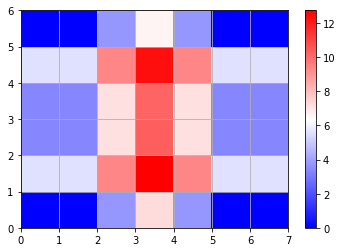

In [ ]:
plotR(b, 'bwr') #practically desired pattern is obtained

In [ ]:
lb1 = dose(1,2,0,7,7, "LeftRight")
lb2 = dose(0,6,3,4, 9, "DownUp")
lb3 = dose(4,5,0,7, 9, "RightLeft")



In [ ]:
lb = lb1 + lb2 + lb3

In [ ]:
lb

array([[ 0.   ,  0.   ,  0.   ,  9.   ,  0.   ,  0.   ,  0.   ],
       [ 7.   ,  6.125,  5.25 , 12.25 ,  3.5  ,  2.625,  1.75 ],
       [ 0.   ,  0.   ,  0.   ,  6.75 ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  5.625,  0.   ,  0.   ,  0.   ],
       [ 1.125,  2.25 ,  3.375,  9.   ,  5.625,  6.75 ,  7.875],
       [ 0.   ,  0.   ,  0.   ,  3.375,  0.   ,  0.   ,  0.   ]])

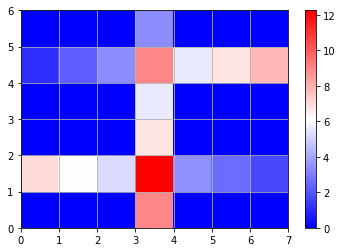

In [ ]:
plotR(lb, 'bwr')